In [8]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings("ignore")

In [9]:
url="https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [10]:
response=requests.get(url)

In [11]:
response

<Response [200]>

In [12]:
response.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/bundle.aa1465.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/bundle.fbaef9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple

In [13]:
pagecontent=response.text

In [60]:
# To disply one product in a web page
from bs4 import BeautifulSoup
soup=BeautifulSoup(pagecontent) 
pname=soup.find("div",attrs={"class":"RG5Slk"})
pname

<div class="RG5Slk">realme TechLife 584 L Frost Free Side by Side Refrigerator  with Water Dispenser, Farm Fresh Technolog...</div>

In [61]:
# Code to get all the products in N no of static pages
productname=[]
for x in soup.find_all("div",attrs={"class":"RG5Slk"}):
    productname.append(x.text if x else np.nan)
# display all product names
for name in productname:
    print(name)

realme TechLife 584 L Frost Free Side by Side Refrigerator  with Water Dispenser, Farm Fresh Technolog...
realme TechLife 584 L Frost Free Side by Side Refrigerator  with Farm Fresh Technology, Inverter Compr...
Samsung 215 L Direct Cool Single Door 5 Star Refrigerator  with Digital Inverter
Godrej 180 L Direct Cool Single Door 2 Star Refrigerator  with Farm Fresh Crisper Technology | Jumbo V...
Samsung 183 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer
Godrej 234 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer  with Energy Efficient Inver...
realme TechLife 233 L Frost Free Double Door 2 Star Refrigerator  with Silver Ion Technology and Ice T...
Samsung 183 L Direct Cool Single Door 4 Star Refrigerator with Base Drawer  with Digital Inverter
Whirlpool 192 L Direct Cool Single Door 4 Star Refrigerator
Samsung 322 L Frost Free Double Door 3 Star Convertible Refrigerator
Whirlpool 215 L Frost Free Triple Door Refrigerator
Samsung 236 L Frost Free Double Doo

In [63]:
#To display ratings of each product
ratings=soup.find("div",attrs={"class":"MKiFS6"})
ratings

<div class="MKiFS6">4.3</div>

In [64]:
#For Multiple ratings
ratings=[]
for x in soup.find_all('div',attrs={'class':'MKiFS6'}):
    ratings.append(x.text if x else np.nan)
# display all ratings
for name in ratings:
    print(name)

4.3
4.3
4.4
4.3
4.5
4.3
4.3
4.5
4.3
4.2
4.2
4.4
4.2
4.2
4.4
4.5
4.3
4.5
4.5
4.2
4.1
4.2
4.3
4.2
4.4
5
5
4.5
5
5
4.1
5
5
4.3
3
5
4.4
5
5


In [65]:
for i in range(1,100):
    url=f"https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    print(url)

https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=o

In [9]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import time

productname = [] 
price = []
rating = []
features = []
pagenum = []
original_price = []
Discount = []
Review = []

total_time = time.time()

for i in range(1,57): 
    start_time = time.time()
    URL = f"https://www.flipkart.com/search?q=refrigerators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all('div', attrs={'class':'ZFwe0M row'}):
        pname = x.find('div', attrs={'class':'RG5Slk'})
        cost = x.find('div', attrs={'class':'hZ3P6w DeU9vF'})   # discounted price
        rat = x.find('div', attrs={'class':'MKiFS6'})
        specs = x.find('div', attrs={'class':'CMXw7N'})
        op = x.find('div', attrs={'class':'kRYCnD gxR4EY'})
        discount = x.find('div', attrs={'class':'HQe8jr'})
        reviews = x.find('span', attrs={'class':'PvbNMB'})
      
        

        productname.append(pname.text if pname else np.nan)
        price.append(cost.text if cost else np.nan)
        rating.append(rat.text if rat else np.nan)
        features.append(specs.text if specs else np.nan)
        original_price.append(op.text if op else np.nan)
        Discount.append(discount.text if discount else np.nan)
        Review.append(reviews.text if reviews else np.nan)
   
        
        pagenum.append(i)

    print(f'Page {i} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))

Page 1 completed in 0.85 seconds
Page 2 completed in 0.76 seconds
Page 3 completed in 0.76 seconds
Page 4 completed in 0.87 seconds
Page 5 completed in 0.21 seconds
Page 6 completed in 0.78 seconds
Page 7 completed in 0.88 seconds
Page 8 completed in 1.06 seconds
Page 9 completed in 1.09 seconds
Page 10 completed in 1.18 seconds
Page 11 completed in 3.18 seconds
Page 12 completed in 1.02 seconds
Page 13 completed in 0.93 seconds
Page 14 completed in 0.61 seconds
Page 15 completed in 1.07 seconds
Page 16 completed in 0.86 seconds
Page 17 completed in 0.96 seconds
Page 18 completed in 0.81 seconds
Page 19 completed in 1.44 seconds
Page 20 completed in 1.01 seconds
Page 21 completed in 0.62 seconds
Page 22 completed in 0.82 seconds
Page 23 completed in 0.53 seconds
Page 24 completed in 0.70 seconds
Page 25 completed in 0.61 seconds
Page 26 completed in 0.60 seconds
Page 27 completed in 0.62 seconds
Page 28 completed in 0.66 seconds
Page 29 completed in 0.53 seconds
Page 30 completed in 0.

In [10]:
import pandas as pd
Refrigerator_DF=pd.DataFrame({"productname":productname,"price":price ,"rating":rating ,"features":features,"pagenum":pagenum,"original_price":original_price,"Discount":Discount,"Review":Review}) 

In [11]:
Refrigerator_DF

,productname,price,rating,features,pagenum,original_price,Discount,Review
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,"₹12,990",4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,"₹17,500",25% off,"26,183 Ratings & 1,522 Reviews"
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,"₹15,790",4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,"₹21,200",25% off,"4,921 Ratings & 296 Reviews"
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,"₹10,990",4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,"₹16,990",35% off,"15,897 Ratings & 814 Reviews"
3,Samsung 215 L Direct Cool Single Door 5 Star R...,"₹19,490",4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,"₹30,999",37% off,"21,536 Ratings & 1,607 Reviews"
4,Samsung 183 L Direct Cool Single Door 5 Star R...,"₹17,290",4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,"₹21,999",21% off,"1,05,931 Ratings & 6,404 Reviews"
...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹17,690",NaN,inverter10 years on compressor,41,"₹25,690",31% off,NaN
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹16,820",4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,"₹25,690",34% off,3 Ratings & 0 Reviews
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,"₹15,890",4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,"₹17,990",11% off,61 Ratings & 4 Reviews
934,Haier 240 L Frost Free Double Door Top Mount 2...,"₹23,900",3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,"₹36,790",35% off,3 Ratings & 0 Reviews


In [12]:
Refrigerator_DF.to_csv("Flipkart_Refrigerators.csv",index=False)

In [16]:
DF=pd.read_csv("Flipkart_Refrigerators.csv")

In [17]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,"₹12,990",4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,"₹17,500",25% off,"26,183 Ratings & 1,522 Reviews"
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,"₹15,790",4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,"₹21,200",25% off,"4,921 Ratings & 296 Reviews"
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,"₹10,990",4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,"₹16,990",35% off,"15,897 Ratings & 814 Reviews"
3,Samsung 215 L Direct Cool Single Door 5 Star R...,"₹19,490",4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,"₹30,999",37% off,"21,536 Ratings & 1,607 Reviews"
4,Samsung 183 L Direct Cool Single Door 5 Star R...,"₹17,290",4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,"₹21,999",21% off,"1,05,931 Ratings & 6,404 Reviews"
...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹17,690",NaN,inverter10 years on compressor,41,"₹25,690",31% off,NaN
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹16,820",4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,"₹25,690",34% off,3 Ratings & 0 Reviews
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,"₹15,890",4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,"₹17,990",11% off,61 Ratings & 4 Reviews
934,Haier 240 L Frost Free Double Door Top Mount 2...,"₹23,900",3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,"₹36,790",35% off,3 Ratings & 0 Reviews


In [18]:
pwd

'C:\\Users\\nenav'

In [20]:
DF=pd.read_csv(r"C:\Users\nenav\Flipkart_Refrigerators.csv")

In [21]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,"₹12,990",4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,"₹17,500",25% off,"26,183 Ratings & 1,522 Reviews"
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,"₹15,790",4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,"₹21,200",25% off,"4,921 Ratings & 296 Reviews"
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,"₹10,990",4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,"₹16,990",35% off,"15,897 Ratings & 814 Reviews"
3,Samsung 215 L Direct Cool Single Door 5 Star R...,"₹19,490",4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,"₹30,999",37% off,"21,536 Ratings & 1,607 Reviews"
4,Samsung 183 L Direct Cool Single Door 5 Star R...,"₹17,290",4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,"₹21,999",21% off,"1,05,931 Ratings & 6,404 Reviews"
...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹17,690",NaN,inverter10 years on compressor,41,"₹25,690",31% off,NaN
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹16,820",4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,"₹25,690",34% off,3 Ratings & 0 Reviews
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,"₹15,890",4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,"₹17,990",11% off,61 Ratings & 4 Reviews
934,Haier 240 L Frost Free Double Door Top Mount 2...,"₹23,900",3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,"₹36,790",35% off,3 Ratings & 0 Reviews


In [24]:
DF.shape

(936, 8)

In [25]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     936 non-null    object 
 1   price           930 non-null    object 
 2   rating          830 non-null    float64
 3   features        927 non-null    object 
 4   pagenum         936 non-null    int64  
 5   original_price  923 non-null    object 
 6   Discount        904 non-null    object 
 7   Review          830 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 58.6+ KB


In [26]:
DF.isnull().sum()

productname         0
price               6
rating            106
features            9
pagenum             0
original_price     13
Discount           32
Review            106
dtype: int64

In [38]:
DF["productname"].value_counts() #Example not need for all

productname
Whirlpool 184 L Direct Cool Single Door 2 Star Refrigerator                                                  121
Whirlpool 184 L Direct Cool Single Door 3 Star Refrigerator                                                   86
Whirlpool 192 L Direct Cool Single Door 3 Star Refrigerator                                                   52
Whirlpool 184 L Direct Cool Single Door 5 Star Refrigerator                                                   39
Haier 190 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer                                       9
                                                                                                            ... 
Godrej 180 L Direct Cool Single Door 4 Star Refrigerator  with Large Vegetable Tray And 2.25 L Bottle ...      1
Haier 358 L Frost Free Double Door Top Mount 3 Star Convertible Refrigerator                                   1
Godrej 233 L Frost Free Double Door Top Mount 2 Star Refrigerator                   

In [31]:
DF["price"] = DF["price"].fillna(DF["price"].mode()[0])

In [32]:
DF["rating"] = DF["rating"].fillna(DF["rating"].mode()[0])

In [33]:
DF["features"] = DF["features"].fillna(DF["features"].mode()[0])

In [34]:
DF["original_price"] = DF["original_price"].fillna(DF["original_price"].mode()[0])

In [36]:
DF["Discount"] = DF["Discount"].fillna(DF["Discount"].mode()[0])

In [37]:
DF["Review"] = DF["Review"].fillna(DF["Review"].mode()[0])

In [39]:
DF.isnull().sum()

productname       0
price             0
rating            0
features          0
pagenum           0
original_price    0
Discount          0
Review            0
dtype: int64

In [40]:
DF.duplicated().sum()

np.int64(1)

In [41]:
DF.drop_duplicates(inplace=True)

In [42]:
DF.duplicated().sum()

np.int64(0)

In [43]:
DF.head()

,productname,price,rating,features,pagenum,original_price,Discount,Review
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,"₹12,990",4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,"₹17,500",25% off,"26,183 Ratings & 1,522 Reviews"
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,"₹15,790",4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,"₹21,200",25% off,"4,921 Ratings & 296 Reviews"
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,"₹10,990",4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,"₹16,990",35% off,"15,897 Ratings & 814 Reviews"
3,Samsung 215 L Direct Cool Single Door 5 Star R...,"₹19,490",4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,"₹30,999",37% off,"21,536 Ratings & 1,607 Reviews"
4,Samsung 183 L Direct Cool Single Door 5 Star R...,"₹17,290",4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,"₹21,999",21% off,"1,05,931 Ratings & 6,404 Reviews"


In [44]:
DF.tail()

,productname,price,rating,features,pagenum,original_price,Discount,Review
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹17,690",4.3,inverter10 years on compressor,41,"₹25,690",31% off,"20,260 Ratings & 1,029 Reviews"
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹16,820",4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,"₹25,690",34% off,3 Ratings & 0 Reviews
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,"₹15,890",4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,"₹17,990",11% off,61 Ratings & 4 Reviews
934,Haier 240 L Frost Free Double Door Top Mount 2...,"₹23,900",3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,"₹36,790",35% off,3 Ratings & 0 Reviews
935,Samsung 256 L Frost Free Double Door Top Mount...,"₹31,500",3.3,Digital InverterBuilt-in Stabilizer1 year comp...,41,"₹42,990",26% off,3 Ratings & 0 Reviews


In [46]:
DF.shape

(935, 8)

In [49]:
import re
DF["productname"].apply(lambda x:re.findall(r"^\w+",x)[0])

0      Whirlpool
1      Whirlpool
2         Godrej
3        Samsung
4        Samsung
         ...    
931       Godrej
932       Godrej
933           LG
934        Haier
935      Samsung
Name: productname, Length: 935, dtype: object

In [50]:
DF["Refrigerator_Brands"]=df["productname"].apply(lambda x:re.findall(r"^\w+",x)[0]) #To create new column in dataframe

In [51]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review,Refrigerator_Brands
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,"₹12,990",4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,"₹17,500",25% off,"26,183 Ratings & 1,522 Reviews",Whirlpool
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,"₹15,790",4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,"₹21,200",25% off,"4,921 Ratings & 296 Reviews",Whirlpool
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,"₹10,990",4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,"₹16,990",35% off,"15,897 Ratings & 814 Reviews",Godrej
3,Samsung 215 L Direct Cool Single Door 5 Star R...,"₹19,490",4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,"₹30,999",37% off,"21,536 Ratings & 1,607 Reviews",Samsung
4,Samsung 183 L Direct Cool Single Door 5 Star R...,"₹17,290",4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,"₹21,999",21% off,"1,05,931 Ratings & 6,404 Reviews",Samsung
...,...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹17,690",4.3,inverter10 years on compressor,41,"₹25,690",31% off,"20,260 Ratings & 1,029 Reviews",Godrej
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹16,820",4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,"₹25,690",34% off,3 Ratings & 0 Reviews,Godrej
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,"₹15,890",4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,"₹17,990",11% off,61 Ratings & 4 Reviews,LG
934,Haier 240 L Frost Free Double Door Top Mount 2...,"₹23,900",3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,"₹36,790",35% off,3 Ratings & 0 Reviews,Haier


In [54]:
DF["Refrigerator_Brands"].value_counts().head(10)

Refrigerator_Brands
Whirlpool    435
Samsung       96
Haier         90
Godrej        59
LG            43
Voltas        34
Lloyd         26
BOSCH         25
IFB           19
Blue          10
Name: count, dtype: int64

In [56]:
DF.isnull().sum()

productname            0
price                  0
rating                 0
features               0
pagenum                0
original_price         0
Discount               0
Review                 0
Refrigerator_Brands    0
dtype: int64

In [59]:
DF.duplicated().sum()

np.int64(0)

In [62]:
DF["Ratings1"]=DF["Review"].apply(lambda x:re.split(r"[&]",x)[0])

In [63]:
DF["No_Of_Ratings"]=DF["Ratings1"].apply(lambda x:re.findall(r"[\d,]+",x)[0].replace(",","")).astype("int")

In [64]:
DF["Ratings1"].apply(lambda x:re.findall(r"[\d,]+",x)[0].replace(",","")).astype("int")

0       26183
1        4921
2       15897
3       21536
4      105931
        ...  
931     20260
932         3
933        61
934         3
935         3
Name: Ratings1, Length: 935, dtype: int64

In [65]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review,Refrigerator_Brands,Ratings1,No_Of_Ratings
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,"₹12,990",4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,"₹17,500",25% off,"26,183 Ratings & 1,522 Reviews",Whirlpool,"26,183 Ratings",26183
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,"₹15,790",4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,"₹21,200",25% off,"4,921 Ratings & 296 Reviews",Whirlpool,"4,921 Ratings",4921
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,"₹10,990",4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,"₹16,990",35% off,"15,897 Ratings & 814 Reviews",Godrej,"15,897 Ratings",15897
3,Samsung 215 L Direct Cool Single Door 5 Star R...,"₹19,490",4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,"₹30,999",37% off,"21,536 Ratings & 1,607 Reviews",Samsung,"21,536 Ratings",21536
4,Samsung 183 L Direct Cool Single Door 5 Star R...,"₹17,290",4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,"₹21,999",21% off,"1,05,931 Ratings & 6,404 Reviews",Samsung,"1,05,931 Ratings",105931
...,...,...,...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹17,690",4.3,inverter10 years on compressor,41,"₹25,690",31% off,"20,260 Ratings & 1,029 Reviews",Godrej,"20,260 Ratings",20260
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹16,820",4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,"₹25,690",34% off,3 Ratings & 0 Reviews,Godrej,3 Ratings,3
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,"₹15,890",4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,"₹17,990",11% off,61 Ratings & 4 Reviews,LG,61 Ratings,61
934,Haier 240 L Frost Free Double Door Top Mount 2...,"₹23,900",3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,"₹36,790",35% off,3 Ratings & 0 Reviews,Haier,3 Ratings,3


In [66]:
DF["Reviews1"]=DF["Review"].apply(lambda x:re.split(r"[&]",x)[1])

In [68]:
DF["No_Of_Reviews"]=DF["Reviews1"].apply(lambda x:re.findall(r"[\d,]+",x)[0].replace(",","")).astype("int")

In [69]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review,Refrigerator_Brands,Ratings1,No_Of_Ratings,Reviews1,No_Of_Reviews
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,"₹12,990",4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,"₹17,500",25% off,"26,183 Ratings & 1,522 Reviews",Whirlpool,"26,183 Ratings",26183,"1,522 Reviews",1522
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,"₹15,790",4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,"₹21,200",25% off,"4,921 Ratings & 296 Reviews",Whirlpool,"4,921 Ratings",4921,296 Reviews,296
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,"₹10,990",4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,"₹16,990",35% off,"15,897 Ratings & 814 Reviews",Godrej,"15,897 Ratings",15897,814 Reviews,814
3,Samsung 215 L Direct Cool Single Door 5 Star R...,"₹19,490",4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,"₹30,999",37% off,"21,536 Ratings & 1,607 Reviews",Samsung,"21,536 Ratings",21536,"1,607 Reviews",1607
4,Samsung 183 L Direct Cool Single Door 5 Star R...,"₹17,290",4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,"₹21,999",21% off,"1,05,931 Ratings & 6,404 Reviews",Samsung,"1,05,931 Ratings",105931,"6,404 Reviews",6404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹17,690",4.3,inverter10 years on compressor,41,"₹25,690",31% off,"20,260 Ratings & 1,029 Reviews",Godrej,"20,260 Ratings",20260,"1,029 Reviews",1029
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,"₹16,820",4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,"₹25,690",34% off,3 Ratings & 0 Reviews,Godrej,3 Ratings,3,0 Reviews,0
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,"₹15,890",4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,"₹17,990",11% off,61 Ratings & 4 Reviews,LG,61 Ratings,61,4 Reviews,4
934,Haier 240 L Frost Free Double Door Top Mount 2...,"₹23,900",3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,"₹36,790",35% off,3 Ratings & 0 Reviews,Haier,3 Ratings,3,0 Reviews,0


In [71]:
DF["price"]=DF["price"].apply(lambda x:re.sub(r"[₹,]","",x)).astype("int")

In [72]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review,Refrigerator_Brands,Ratings1,No_Of_Ratings,Reviews1,No_Of_Reviews
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,12990,4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,"₹17,500",25% off,"26,183 Ratings & 1,522 Reviews",Whirlpool,"26,183 Ratings",26183,"1,522 Reviews",1522
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,15790,4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,"₹21,200",25% off,"4,921 Ratings & 296 Reviews",Whirlpool,"4,921 Ratings",4921,296 Reviews,296
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,10990,4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,"₹16,990",35% off,"15,897 Ratings & 814 Reviews",Godrej,"15,897 Ratings",15897,814 Reviews,814
3,Samsung 215 L Direct Cool Single Door 5 Star R...,19490,4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,"₹30,999",37% off,"21,536 Ratings & 1,607 Reviews",Samsung,"21,536 Ratings",21536,"1,607 Reviews",1607
4,Samsung 183 L Direct Cool Single Door 5 Star R...,17290,4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,"₹21,999",21% off,"1,05,931 Ratings & 6,404 Reviews",Samsung,"1,05,931 Ratings",105931,"6,404 Reviews",6404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,17690,4.3,inverter10 years on compressor,41,"₹25,690",31% off,"20,260 Ratings & 1,029 Reviews",Godrej,"20,260 Ratings",20260,"1,029 Reviews",1029
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,16820,4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,"₹25,690",34% off,3 Ratings & 0 Reviews,Godrej,3 Ratings,3,0 Reviews,0
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,15890,4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,"₹17,990",11% off,61 Ratings & 4 Reviews,LG,61 Ratings,61,4 Reviews,4
934,Haier 240 L Frost Free Double Door Top Mount 2...,23900,3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,"₹36,790",35% off,3 Ratings & 0 Reviews,Haier,3 Ratings,3,0 Reviews,0


In [74]:
DF["original_price"]=DF["original_price"].apply(lambda x:re.sub(r"[₹,]","",x)).astype(int)

In [75]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review,Refrigerator_Brands,Ratings1,No_Of_Ratings,Reviews1,No_Of_Reviews
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,12990,4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,17500,25% off,"26,183 Ratings & 1,522 Reviews",Whirlpool,"26,183 Ratings",26183,"1,522 Reviews",1522
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,15790,4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,21200,25% off,"4,921 Ratings & 296 Reviews",Whirlpool,"4,921 Ratings",4921,296 Reviews,296
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,10990,4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,16990,35% off,"15,897 Ratings & 814 Reviews",Godrej,"15,897 Ratings",15897,814 Reviews,814
3,Samsung 215 L Direct Cool Single Door 5 Star R...,19490,4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,30999,37% off,"21,536 Ratings & 1,607 Reviews",Samsung,"21,536 Ratings",21536,"1,607 Reviews",1607
4,Samsung 183 L Direct Cool Single Door 5 Star R...,17290,4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,21999,21% off,"1,05,931 Ratings & 6,404 Reviews",Samsung,"1,05,931 Ratings",105931,"6,404 Reviews",6404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,17690,4.3,inverter10 years on compressor,41,25690,31% off,"20,260 Ratings & 1,029 Reviews",Godrej,"20,260 Ratings",20260,"1,029 Reviews",1029
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,16820,4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,25690,34% off,3 Ratings & 0 Reviews,Godrej,3 Ratings,3,0 Reviews,0
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,15890,4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,17990,11% off,61 Ratings & 4 Reviews,LG,61 Ratings,61,4 Reviews,4
934,Haier 240 L Frost Free Double Door Top Mount 2...,23900,3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,36790,35% off,3 Ratings & 0 Reviews,Haier,3 Ratings,3,0 Reviews,0


In [76]:
DF["Discount"].apply(lambda x:re.findall("[\d%]+",x)[0])

0      25%
1      25%
2      35%
3      37%
4      21%
      ... 
931    31%
932    34%
933    11%
934    35%
935    26%
Name: Discount, Length: 935, dtype: object

In [78]:
DF["Discount"]=DF["Discount"].apply(lambda x:re.findall("[\d%]+",x)[0])

In [79]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review,Refrigerator_Brands,Ratings1,No_Of_Ratings,Reviews1,No_Of_Reviews
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,12990,4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,17500,25%,"26,183 Ratings & 1,522 Reviews",Whirlpool,"26,183 Ratings",26183,"1,522 Reviews",1522
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,15790,4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,21200,25%,"4,921 Ratings & 296 Reviews",Whirlpool,"4,921 Ratings",4921,296 Reviews,296
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,10990,4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,16990,35%,"15,897 Ratings & 814 Reviews",Godrej,"15,897 Ratings",15897,814 Reviews,814
3,Samsung 215 L Direct Cool Single Door 5 Star R...,19490,4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,30999,37%,"21,536 Ratings & 1,607 Reviews",Samsung,"21,536 Ratings",21536,"1,607 Reviews",1607
4,Samsung 183 L Direct Cool Single Door 5 Star R...,17290,4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,21999,21%,"1,05,931 Ratings & 6,404 Reviews",Samsung,"1,05,931 Ratings",105931,"6,404 Reviews",6404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,17690,4.3,inverter10 years on compressor,41,25690,31%,"20,260 Ratings & 1,029 Reviews",Godrej,"20,260 Ratings",20260,"1,029 Reviews",1029
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,16820,4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,25690,34%,3 Ratings & 0 Reviews,Godrej,3 Ratings,3,0 Reviews,0
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,15890,4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,17990,11%,61 Ratings & 4 Reviews,LG,61 Ratings,61,4 Reviews,4
934,Haier 240 L Frost Free Double Door Top Mount 2...,23900,3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,36790,35%,3 Ratings & 0 Reviews,Haier,3 Ratings,3,0 Reviews,0


In [80]:
DF.columns

Index(['productname', 'price', 'rating', 'features', 'pagenum',
       'original_price', 'Discount', 'Review', 'Refrigerator_Brands',
       'Ratings1', 'No_Of_Ratings', 'Reviews1', 'No_Of_Reviews'],
      dtype='object')

In [81]:
DF["capacity_liters"] = DF["productname"].str.extract(r"(\d+)\s*L").astype(float)

In [87]:
DF["Star_rating"] = DF["productname"].str.extract(r"(\d)\s*Star").astype(float)

In [88]:
DF["Fridge_type"] = DF["productname"].str.extract(
    r"(Direct Cool|Frost Free|Side by Side)", expand=False
)

In [89]:
DF["door_type"] = DF["productname"].str.extract(
    r"(Single Door|Double Door|Triple Door)", expand=False
)

In [90]:
DF

,productname,price,rating,features,pagenum,original_price,Discount,Review,Refrigerator_Brands,Ratings1,No_Of_Ratings,Reviews1,No_Of_Reviews,capacity_liters,energy_star,Fridge_type,door_type,Star_rating
0,Whirlpool 184 L Direct Cool Single Door 2 Star...,12990,4.3,Normal CompressorBuilt-in Stabilizer1 Year Com...,1,17500,25%,"26,183 Ratings & 1,522 Reviews",Whirlpool,"26,183 Ratings",26183,"1,522 Reviews",1522,184.0,2.0,Direct Cool,Single Door,2.0
1,Whirlpool 192 L Direct Cool Single Door 3 Star...,15790,4.2,Reciprocating CompressorBuilt-in Stabilizer1 Y...,1,21200,25%,"4,921 Ratings & 296 Reviews",Whirlpool,"4,921 Ratings",4921,296 Reviews,296,192.0,3.0,Direct Cool,Single Door,3.0
2,Godrej 180 L Direct Cool Single Door 2 Star Re...,10990,4.3,Reciprocatory CompressorBuilt-in Stabilizer1 Y...,1,16990,35%,"15,897 Ratings & 814 Reviews",Godrej,"15,897 Ratings",15897,814 Reviews,814,180.0,2.0,Direct Cool,Single Door,2.0
3,Samsung 215 L Direct Cool Single Door 5 Star R...,19490,4.4,Digital Inverter CompressorBuilt-in Stabilizer...,1,30999,37%,"21,536 Ratings & 1,607 Reviews",Samsung,"21,536 Ratings",21536,"1,607 Reviews",1607,215.0,5.0,Direct Cool,Single Door,5.0
4,Samsung 183 L Direct Cool Single Door 5 Star R...,17290,4.5,ReciprocatingBuilt-in Stabilizer1 year compreh...,1,21999,21%,"1,05,931 Ratings & 6,404 Reviews",Samsung,"1,05,931 Ratings",105931,"6,404 Reviews",6404,183.0,5.0,Direct Cool,Single Door,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Godrej 180 L Direct Cool Single Door 5 Star Re...,17690,4.3,inverter10 years on compressor,41,25690,31%,"20,260 Ratings & 1,029 Reviews",Godrej,"20,260 Ratings",20260,"1,029 Reviews",1029,180.0,5.0,Direct Cool,Single Door,5.0
932,Godrej 180 L Direct Cool Single Door 5 Star Re...,16820,4.7,Inverter CompressorBuilt-in Stabilizer10 Years...,41,25690,34%,3 Ratings & 0 Reviews,Godrej,3 Ratings,3,0 Reviews,0,180.0,5.0,Direct Cool,Single Door,5.0
933,LG 185 L Direct Cool Single Door 1 Star Refrig...,15890,4.2,RECIPROCATING COMPRESSORBuilt-in Stabilizer1 Y...,41,17990,11%,61 Ratings & 4 Reviews,LG,61 Ratings,61,4 Reviews,4,185.0,1.0,Direct Cool,Single Door,1.0
934,Haier 240 L Frost Free Double Door Top Mount 2...,23900,3.7,NormalBuilt-in Stabilizer2 Year Warranty on Pr...,41,36790,35%,3 Ratings & 0 Reviews,Haier,3 Ratings,3,0 Reviews,0,240.0,2.0,Frost Free,Double Door,2.0


In [95]:
DF.shape

(935, 18)

In [96]:
DF.columns

Index(['productname', 'price', 'rating', 'features', 'pagenum',
       'original_price', 'Discount', 'Review', 'Refrigerator_Brands',
       'Ratings1', 'No_Of_Ratings', 'Reviews1', 'No_Of_Reviews',
       'capacity_liters', 'energy_star', 'Fridge_type', 'door_type',
       'Star_rating'],
      dtype='object')

In [103]:
DF = DF.drop(
    columns=['productname', 'features', 'Review', 'Ratings1', 'energy_star'],
    errors='ignore'
)


In [104]:
DF

,price,rating,pagenum,original_price,Discount,Refrigerator_Brands,No_Of_Ratings,No_Of_Reviews,capacity_liters,Fridge_type,door_type,Star_rating
0,12990,4.3,1,17500,25%,Whirlpool,26183,1522,184.0,Direct Cool,Single Door,2.0
1,15790,4.2,1,21200,25%,Whirlpool,4921,296,192.0,Direct Cool,Single Door,3.0
2,10990,4.3,1,16990,35%,Godrej,15897,814,180.0,Direct Cool,Single Door,2.0
3,19490,4.4,1,30999,37%,Samsung,21536,1607,215.0,Direct Cool,Single Door,5.0
4,17290,4.5,1,21999,21%,Samsung,105931,6404,183.0,Direct Cool,Single Door,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
931,17690,4.3,41,25690,31%,Godrej,20260,1029,180.0,Direct Cool,Single Door,5.0
932,16820,4.7,41,25690,34%,Godrej,3,0,180.0,Direct Cool,Single Door,5.0
933,15890,4.2,41,17990,11%,LG,61,4,185.0,Direct Cool,Single Door,1.0
934,23900,3.7,41,36790,35%,Haier,3,0,240.0,Frost Free,Double Door,2.0


In [105]:
DF.isnull().sum()

price                   0
rating                  0
pagenum                 0
original_price          0
Discount                0
Refrigerator_Brands     0
No_Of_Ratings           0
No_Of_Reviews           0
capacity_liters        11
Fridge_type            44
door_type              54
Star_rating            96
dtype: int64

In [107]:
DF.duplicated().sum()

np.int64(0)

In [108]:
DF

,price,rating,pagenum,original_price,Discount,Refrigerator_Brands,No_Of_Ratings,No_Of_Reviews,capacity_liters,Fridge_type,door_type,Star_rating
0,12990,4.3,1,17500,25%,Whirlpool,26183,1522,184.0,Direct Cool,Single Door,2.0
1,15790,4.2,1,21200,25%,Whirlpool,4921,296,192.0,Direct Cool,Single Door,3.0
2,10990,4.3,1,16990,35%,Godrej,15897,814,180.0,Direct Cool,Single Door,2.0
3,19490,4.4,1,30999,37%,Samsung,21536,1607,215.0,Direct Cool,Single Door,5.0
4,17290,4.5,1,21999,21%,Samsung,105931,6404,183.0,Direct Cool,Single Door,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
931,17690,4.3,41,25690,31%,Godrej,20260,1029,180.0,Direct Cool,Single Door,5.0
932,16820,4.7,41,25690,34%,Godrej,3,0,180.0,Direct Cool,Single Door,5.0
933,15890,4.2,41,17990,11%,LG,61,4,185.0,Direct Cool,Single Door,1.0
934,23900,3.7,41,36790,35%,Haier,3,0,240.0,Frost Free,Double Door,2.0


In [109]:
DF.to_csv("Cleaned_Refrigerators.csv",index=False)

In [110]:
pwd

'C:\\Users\\nenav'

In [112]:
DF.shape

(935, 12)

In [57]:
DF["Fridge_type"] = DF["Fridge_type"].fillna(DF["Fridge_type"].mode()[0])

In [ ]:
DF["door_type"] = DF["door_type"].fillna(DF["door_type"].mode()[0])

In [58]:
DF["Star_rating"] = DF["Star_rating"].fillna(DF["Star_rating"].mode()[0])

In [59]:
DF.isnull().sum()

price                   0
rating                  0
pagenum                 0
original_price          0
Discount                0
Refrigerator_Brands     0
No_Of_Ratings           0
No_Of_Reviews           0
capacity_liters         0
Fridge_type             0
door_type              54
Star_rating             0
dtype: int64

In [60]:
DF["door_type"] = DF["door_type"].fillna(DF["door_type"].mode()[0])

In [64]:
DF.isnull().sum()

price                  0
rating                 0
pagenum                0
original_price         0
Discount               0
Refrigerator_Brands    0
No_Of_Ratings          0
No_Of_Reviews          0
capacity_liters        0
Fridge_type            0
door_type              0
Star_rating            0
dtype: int64

In [65]:
DF.duplicated().sum()

np.int64(0)

In [66]:
DF

,price,rating,pagenum,original_price,Discount,Refrigerator_Brands,No_Of_Ratings,No_Of_Reviews,capacity_liters,Fridge_type,door_type,Star_rating
0,12990,4.3,1,17500,25%,Whirlpool,26183,1522,184.0,Direct Cool,Single Door,2.0
1,15790,4.2,1,21200,25%,Whirlpool,4921,296,192.0,Direct Cool,Single Door,3.0
2,10990,4.3,1,16990,35%,Godrej,15897,814,180.0,Direct Cool,Single Door,2.0
3,19490,4.4,1,30999,37%,Samsung,21536,1607,215.0,Direct Cool,Single Door,5.0
4,17290,4.5,1,21999,21%,Samsung,105931,6404,183.0,Direct Cool,Single Door,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
930,17690,4.3,41,25690,31%,Godrej,20260,1029,180.0,Direct Cool,Single Door,5.0
931,16820,4.7,41,25690,34%,Godrej,3,0,180.0,Direct Cool,Single Door,5.0
932,15890,4.2,41,17990,11%,LG,61,4,185.0,Direct Cool,Single Door,1.0
933,23900,3.7,41,36790,35%,Haier,3,0,240.0,Frost Free,Double Door,2.0


In [67]:
DF.to_csv("Cleaned_Refrigerators1.csv",index=False)

In [68]:
pwd

'C:\\Users\\nenav'

In [69]:
DF.shape

(935, 12)

In [72]:
DF=pd.read_csv(r"C:\Users\nenav\Cleaned_Refrigerators1.csv")

In [73]:
DF

,price,rating,pagenum,original_price,Discount,Refrigerator_Brands,No_Of_Ratings,No_Of_Reviews,capacity_liters,Fridge_type,door_type,Star_rating
0,12990,4.3,1,17500,25%,Whirlpool,26183,1522,184.0,Direct Cool,Single Door,2.0
1,15790,4.2,1,21200,25%,Whirlpool,4921,296,192.0,Direct Cool,Single Door,3.0
2,10990,4.3,1,16990,35%,Godrej,15897,814,180.0,Direct Cool,Single Door,2.0
3,19490,4.4,1,30999,37%,Samsung,21536,1607,215.0,Direct Cool,Single Door,5.0
4,17290,4.5,1,21999,21%,Samsung,105931,6404,183.0,Direct Cool,Single Door,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
930,17690,4.3,41,25690,31%,Godrej,20260,1029,180.0,Direct Cool,Single Door,5.0
931,16820,4.7,41,25690,34%,Godrej,3,0,180.0,Direct Cool,Single Door,5.0
932,15890,4.2,41,17990,11%,LG,61,4,185.0,Direct Cool,Single Door,1.0
933,23900,3.7,41,36790,35%,Haier,3,0,240.0,Frost Free,Double Door,2.0


## Visualizations

### 1.Univariate Analysis

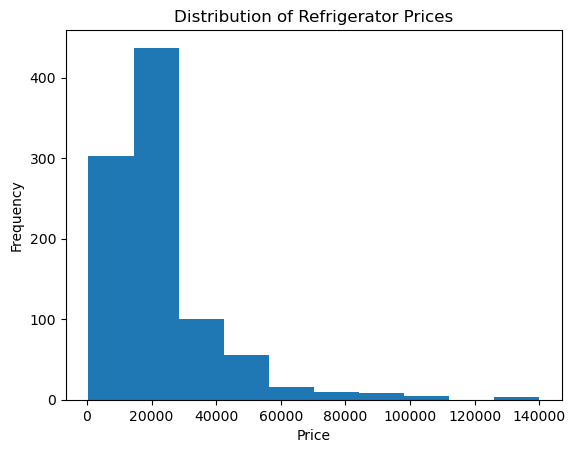

In [76]:
plt.figure()
plt.hist(DF["price"], bins=10)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Refrigerator Prices")
plt.show()

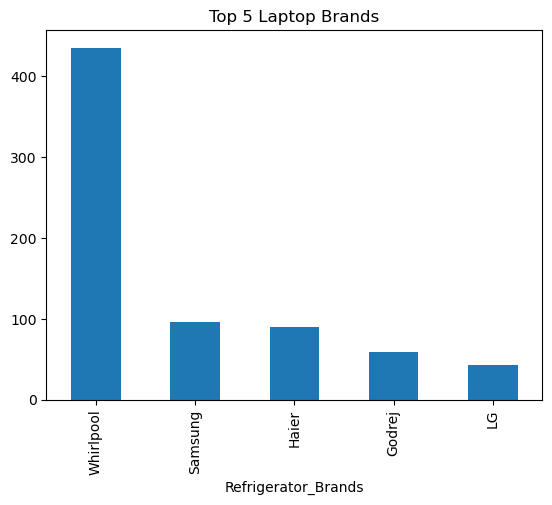

In [77]:
DF["Refrigerator_Brands"].value_counts().head().plot(kind='bar')
plt.title("Top 5 Laptop Brands")
plt.show()

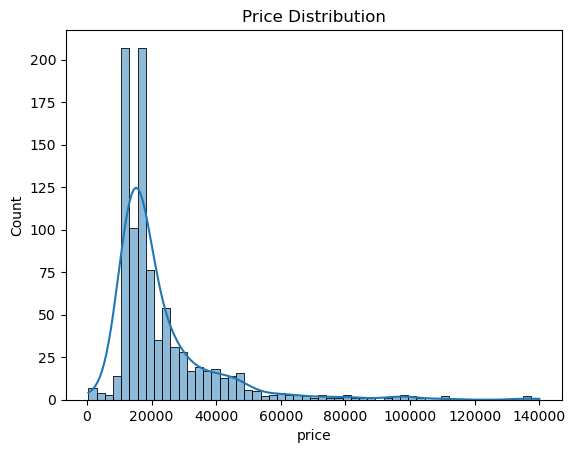

In [79]:
sns.histplot(x=DF["price"],kde=True)
plt.title("Price Distribution")
plt.show()

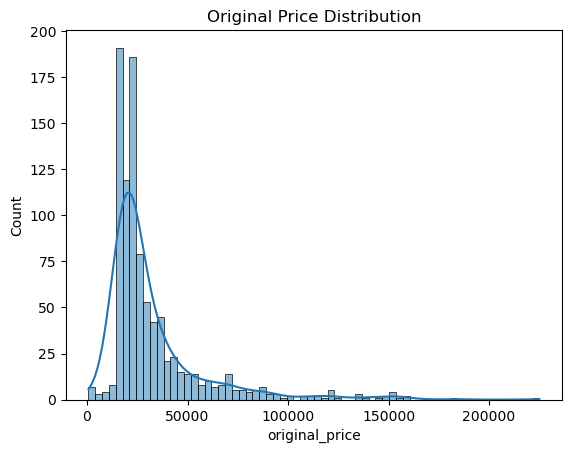

In [80]:
sns.histplot(x=df["original_price"],kde=True)
plt.title("Original Price Distribution")
plt.show()

<Axes: ylabel='price'>

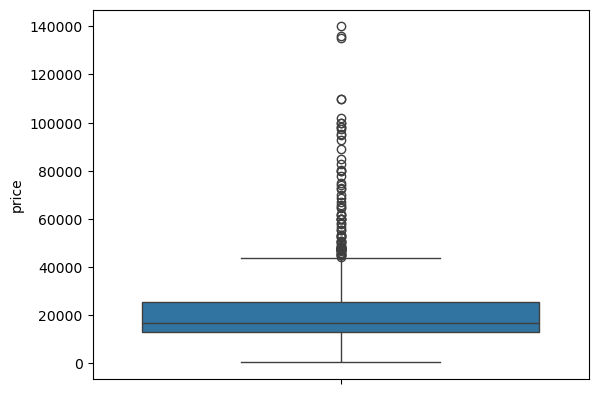

In [81]:
sns.boxplot(df["price"])

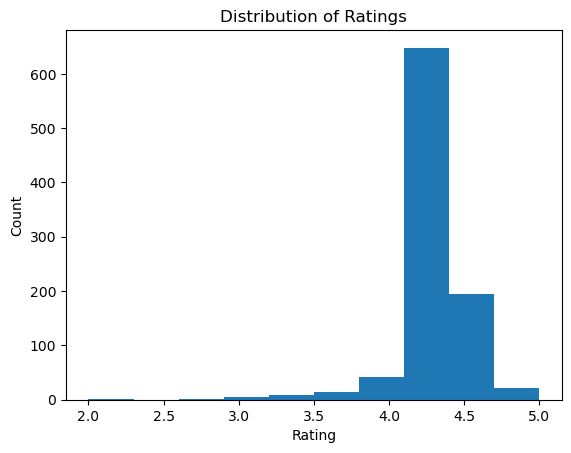

In [83]:
plt.figure()
plt.hist(DF["rating"], bins=10)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

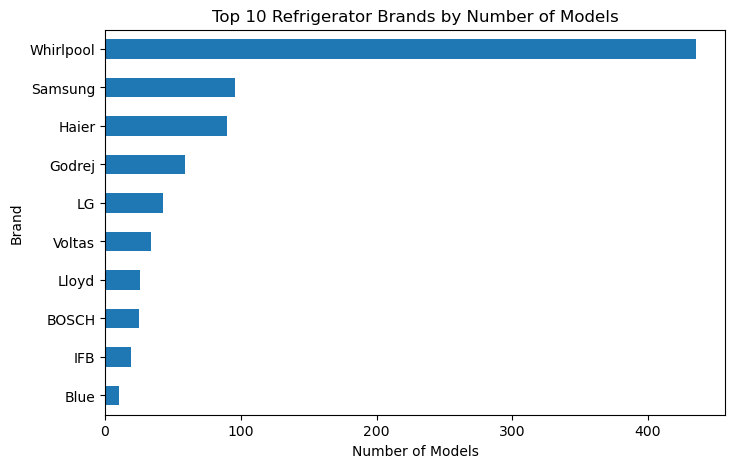

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

top_brands = df["Refrigerator_Brands"].value_counts().head(10)

plt.figure(figsize=(8, 5))
top_brands.plot(kind="barh")
plt.xlabel("Number of Models")
plt.ylabel("Brand")
plt.title("Top 10 Refrigerator Brands by Number of Models")
plt.gca().invert_yaxis()  # highest on top
plt.show()


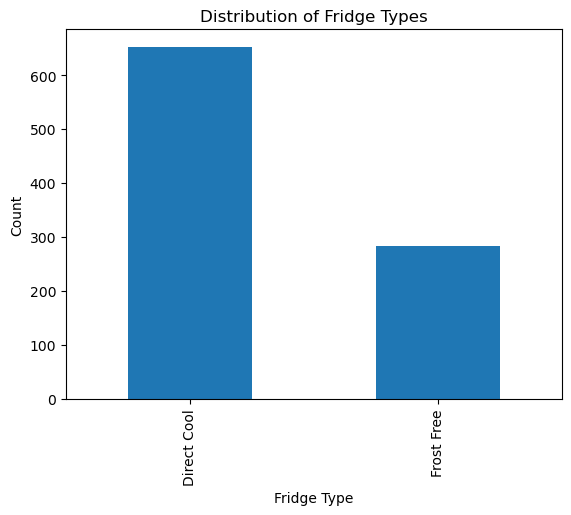

In [85]:
plt.figure()
DF["Fridge_type"].value_counts().plot(kind="bar")
plt.xlabel("Fridge Type")
plt.ylabel("Count")
plt.title("Distribution of Fridge Types")
plt.show()

### 2.Bivariate Analysis

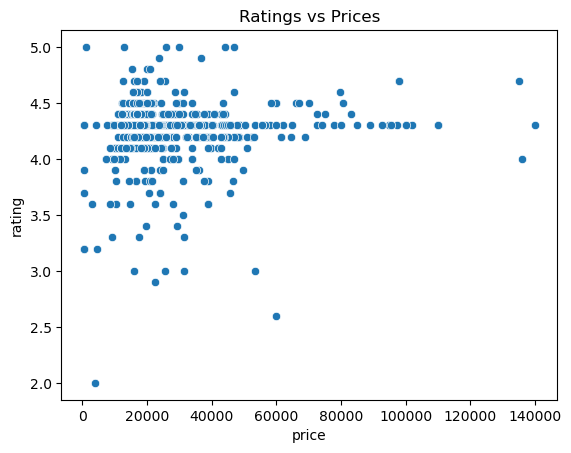

In [95]:
sns.scatterplot(x="price",y="rating",data=df)
plt.title("Ratings vs Prices")
plt.show()

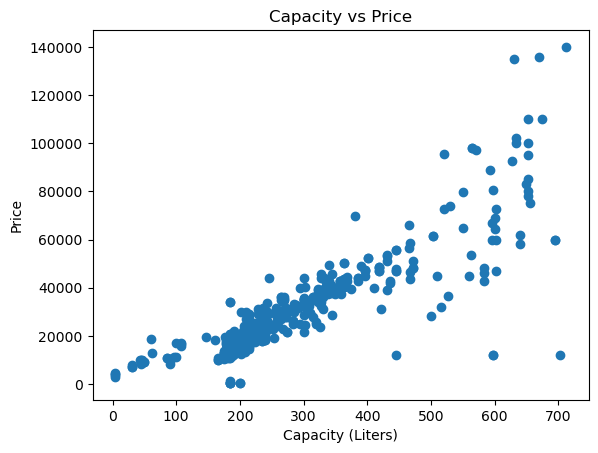

In [96]:
plt.figure()
plt.scatter(DF["capacity_liters"], df["price"])
plt.xlabel("Capacity (Liters)")
plt.ylabel("Price")
plt.title("Capacity vs Price")
plt.show()

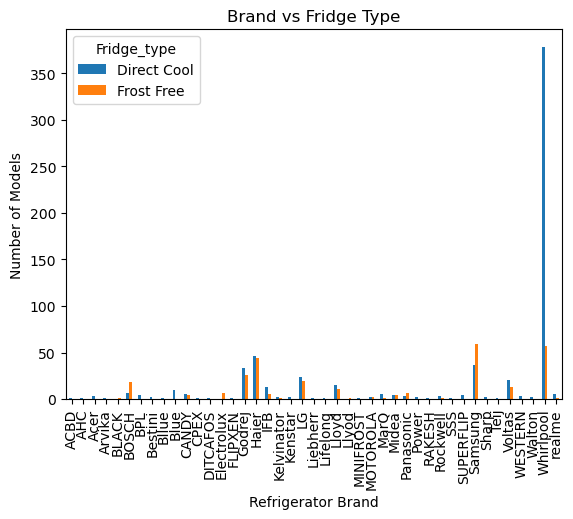

In [99]:
brand_type = pd.crosstab(
    DF["Refrigerator_Brands"],
    DF["Fridge_type"]
)

brand_type.plot(kind="bar")
plt.xlabel("Refrigerator Brand")
plt.ylabel("Number of Models")
plt.title("Brand vs Fridge Type")
plt.xticks(rotation=90)
plt.show()



### 3.Multivariate Analysis

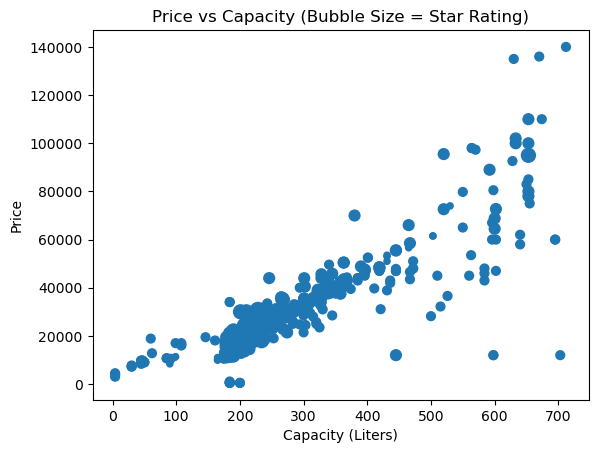

In [100]:
plt.figure()
plt.scatter(
    df["capacity_liters"],
    df["price"],
    s=df["Star_rating"] * 20
)
plt.xlabel("Capacity (Liters)")
plt.ylabel("Price")
plt.title("Price vs Capacity (Bubble Size = Star Rating)")
plt.show()

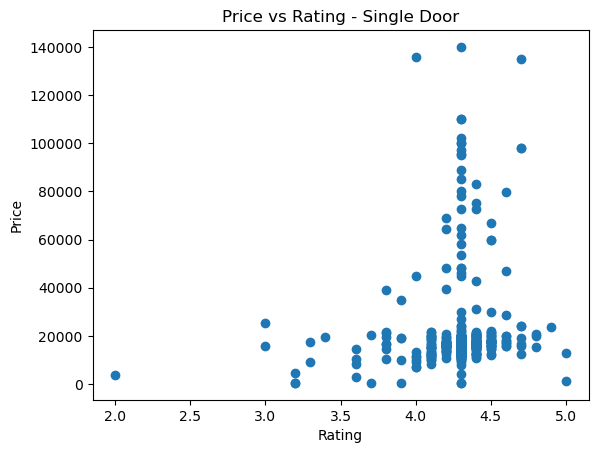

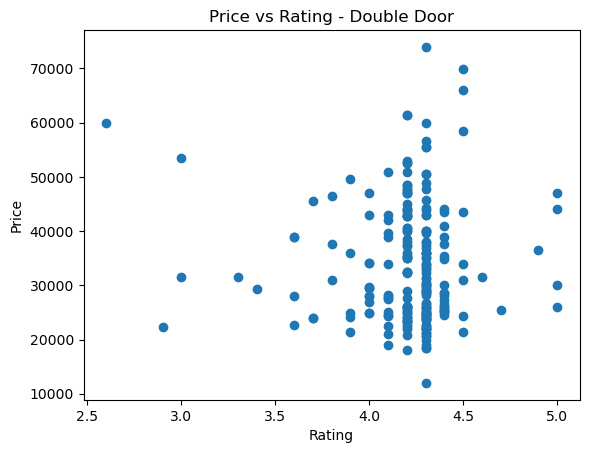

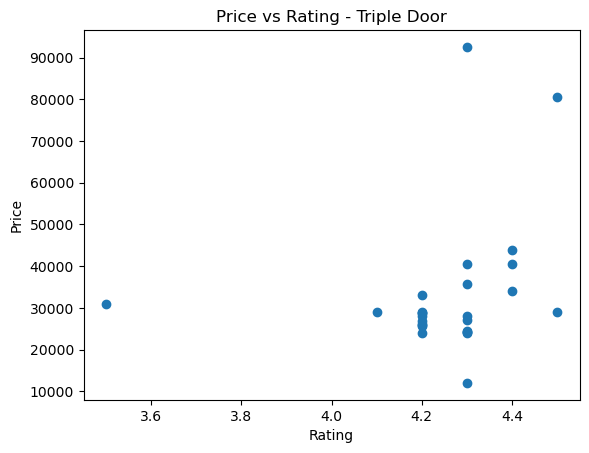

In [101]:
for door in df["door_type"].unique():
    subset = DF[DF["door_type"] == door]
    plt.figure()
    plt.scatter(subset["rating"], subset["price"])
    plt.xlabel("Rating")
    plt.ylabel("Price")
    plt.title(f"Price vs Rating - {door}")
    plt.show()

## CO-Relation

<Axes: >

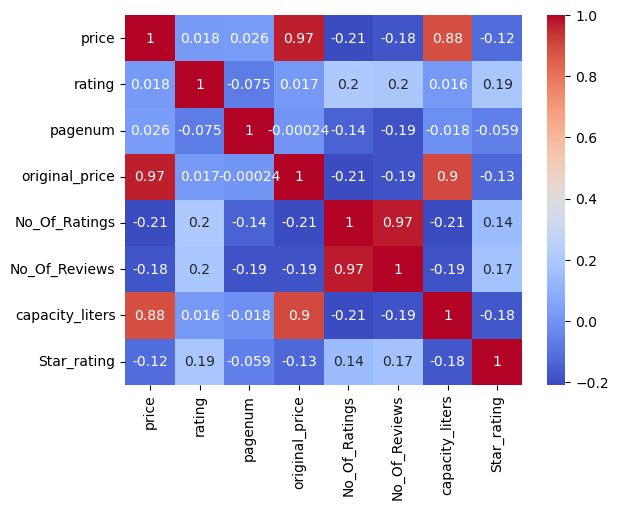

In [102]:
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(),annot=True,cmap="coolwarm")

In [103]:
DF.isnull().sum()

price                  0
rating                 0
pagenum                0
original_price         0
Discount               0
Refrigerator_Brands    0
No_Of_Ratings          0
No_Of_Reviews          0
capacity_liters        0
Fridge_type            0
door_type              0
Star_rating            0
dtype: int64

In [107]:
DF.duplicated().sum()

np.int64(0)

In [108]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                935 non-null    int64  
 1   rating               935 non-null    float64
 2   pagenum              935 non-null    int64  
 3   original_price       935 non-null    int64  
 4   Discount             935 non-null    object 
 5   Refrigerator_Brands  935 non-null    object 
 6   No_Of_Ratings        935 non-null    int64  
 7   No_Of_Reviews        935 non-null    int64  
 8   capacity_liters      935 non-null    float64
 9   Fridge_type          935 non-null    object 
 10  door_type            935 non-null    object 
 11  Star_rating          935 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 87.8+ KB


NameError: name 'DF' is not defined